# Data Analytics - Lab2 Sampling in Python and visualising samples
Author: Piotr Roszkowski

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Generate normaly distributed data to simulate measurements (for exercise 1 and 2):

In [11]:
data = {"Normal": np.random.normal(loc = 0, scale = 1, size = 1000),
        "Modified Mean": np.random.normal(loc = 3, scale = 1, size = 1000),
        "Modified Standard Deviation": np.random.normal(loc = 0, scale = 2, size = 1000),
        "Modif. Mean and Std. Dev.": np.random.normal(loc = 3, scale = 2, size = 1000)} #generate data
dataFrame = pd.DataFrame(data) #create DataFrame with data
data = dataFrame.melt() #melt DataFrame

## EXERCISE 1
##### Normal distribution:

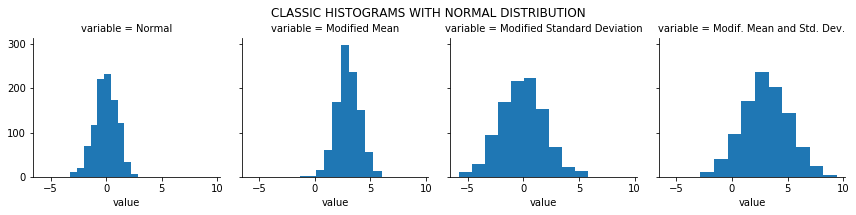

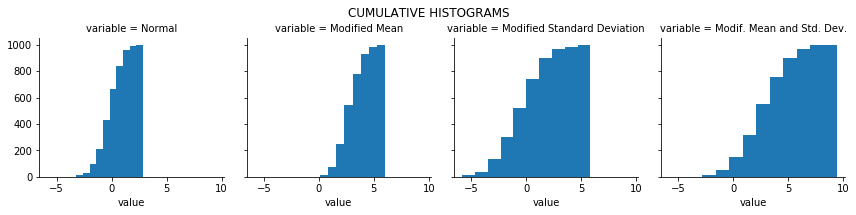

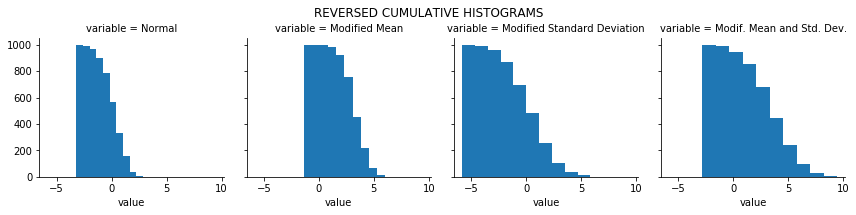

In [12]:
g = sns.FacetGrid(data, col = "variable", sharex = True, sharey = True) #prepare data to map
g.map(plt.hist, "value") #map data using plot hist
g.fig.suptitle("CLASSIC HISTOGRAMS WITH NORMAL DISTRIBUTION") #plot title 
g.fig.tight_layout(rect=[0, 0, 1, 0.95]) #adjusts subplot params
g = sns.FacetGrid(data, col = "variable", sharex = True, sharey = True) 
g.map(plt.hist, "value", cumulative = True)
g.fig.suptitle("CUMULATIVE HISTOGRAMS")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
g = sns.FacetGrid(data, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", cumulative = -1)
g.fig.suptitle("REVERSED CUMULATIVE HISTOGRAMS")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])

##### How number of bins influences the plots:
Figuring out how wide to make the bins is tricky. If bins are so narrow that almost every of measurement gets its own bin. If the bins are to wide, they are not much help.

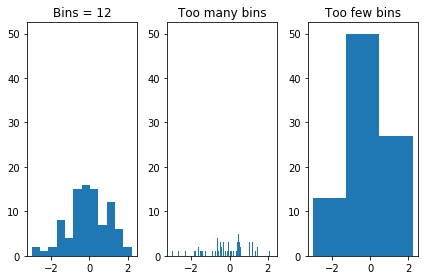

In [13]:
g = plt.figure()
ax1 = plt.subplot(131)
plt.hist(data.iloc[0:90, 1], bins = 12) #right number of bins
plt.title("Bins = 12")
plt.subplot(132, sharey = ax1)
plt.hist(data.iloc[0:90, 1], bins = 150) #too many bins
plt.title("Too many bins")
plt.subplot(133, sharey = ax1)
plt.hist(data.iloc[0:90, 1], bins = 3) #too less bins
plt.title("Too few bins")
plt.tight_layout()

## EXERCISE 2
##### Inverse logit:

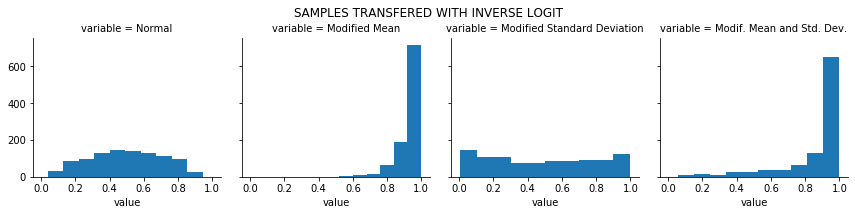

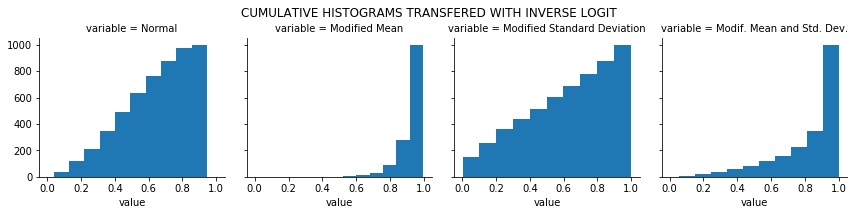

In [14]:
from scipy.special import expit 
expitData = expit(dataFrame) #expit function is inverse logit function
expitDataMelted = expitData.melt()
g = sns.FacetGrid(expitDataMelted, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value")
g.fig.suptitle("SAMPLES TRANSFERED WITH INVERSE LOGIT")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
g = sns.FacetGrid(expitDataMelted, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", cumulative = True)
g.fig.suptitle("CUMULATIVE HISTOGRAMS TRANSFERED WITH INVERSE LOGIT")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])

## EXERCISE 3
##### Poisson distribution: 

Firstly generate poisson distributed data to simulate measurements:

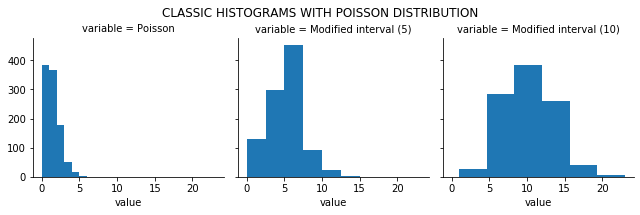

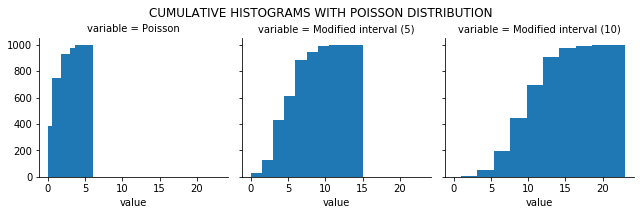

In [15]:
poissonData = {"Poisson": np.random.poisson(lam = 1, size = 1000),
                "Modified interval (5)": np.random.poisson(lam = 5, size = 1000),
                "Modified interval (10)": np.random.poisson(lam = 10, size = 1000)}
                 #where lambda is expected value
poissonDataFrame = pd.DataFrame(poissonData)
poissonData = poissonDataFrame.melt()
g = sns.FacetGrid(poissonData, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", bins = 6)
g.fig.suptitle("CLASSIC HISTOGRAMS WITH POISSON DISTRIBUTION")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
g = sns.FacetGrid(poissonData, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", cumulative = True)
g.fig.suptitle("CUMULATIVE HISTOGRAMS WITH POISSON DISTRIBUTION")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])

## EXERCISE 4
##### Beta distribution:
Firstly generate beta distributed data to simulate measurements:
Beta distribution is parameterized by two shape parameters - alpha and beta, α moderates the affinity towards the upper boundary while β moderates the affinity towards the lower boundary. The exact shape of each probability density function is determined by how these affinities balance against each other. 

Last example is calculated from the Local-Dispersion Parametrization for location = 0.5 and dispersion = 0.4

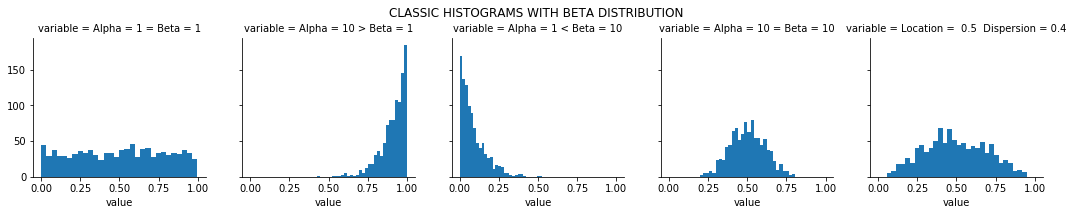

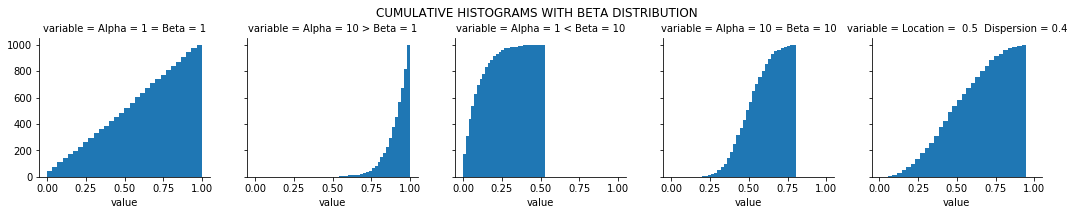

In [16]:
betaData = {"Alpha = 1 = Beta = 1": np.random.beta(1, 1, 1000),
            "Alpha = 10 > Beta = 1": np.random.beta(10, 1, 1000),
            "Alpha = 1 < Beta = 10": np.random.beta(1, 10, 1000),
            "Alpha = 10 = Beta = 10": np.random.beta(10, 10, 1000),
            "Location =  0.5  Dispersion = 0.4": np.random.beta(3, 3, 1000)}
betaDataFrame = pd.DataFrame(betaData)
betaData = betaDataFrame.melt()
g = sns.FacetGrid(betaData, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", bins = 30)
g.fig.suptitle("CLASSIC HISTOGRAMS WITH BETA DISTRIBUTION")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
g = sns.FacetGrid(betaData, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", bins = 30, cumulative = True)
g.fig.suptitle("CUMULATIVE HISTOGRAMS WITH BETA DISTRIBUTION")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])

## EXERCISE 5
##### Log-normal distribution:
Firstly generate log-normal distributed data to simulate measurements:
Log-normal distribution is parameterized by location and scale parameters - mean and σ

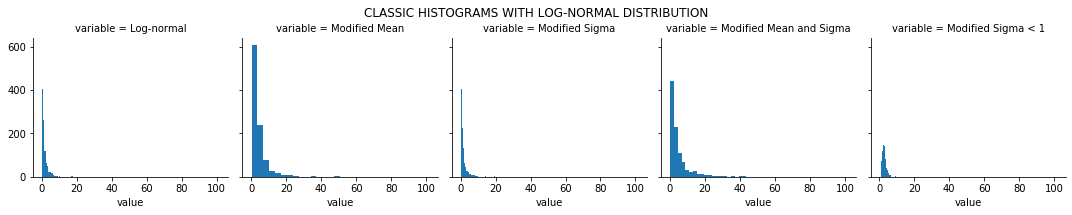

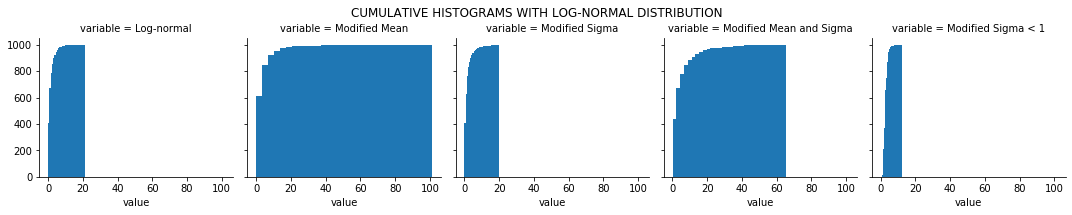

In [17]:
logNormalData = {"Log-normal": np.random.lognormal(mean = 0, sigma = 1, size = 1000),
            "Modified Mean": np.random.lognormal(mean = 1, sigma = 1, size = 1000),
            "Modified Sigma": np.random.lognormal(mean = 0, sigma = 1.1, size = 1000),
            "Modified Mean and Sigma": np.random.lognormal(mean = 1, sigma = 1.1, size = 1000),
            "Modified Sigma < 1": np.random.lognormal(mean = 1, sigma = 0.4, size = 1000)}
logNormalDataFrame = pd.DataFrame(logNormalData)
logNormalData = logNormalDataFrame.melt()
g = sns.FacetGrid(logNormalData, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", bins = 30)
g.fig.suptitle("CLASSIC HISTOGRAMS WITH LOG-NORMAL DISTRIBUTION")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
g = sns.FacetGrid(logNormalData, col = "variable", sharex = True, sharey = True)
g.map(plt.hist, "value", bins = 30, cumulative = True)
g.fig.suptitle("CUMULATIVE HISTOGRAMS WITH LOG-NORMAL DISTRIBUTION")
g.fig.tight_layout(rect=[0, 0, 1, 0.95])